<a href="https://colab.research.google.com/github/leonardo3108/robustez-query/blob/main/code/analysis/Analysis_Discount_Gain_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação ambiente

## Imports

In [93]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
!wget https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_bd_dataframe.py  -P util
!wget https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_noise_functions.py  -P util

--2021-12-07 21:15:23--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_bd_dataframe.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26101 (25K) [text/plain]
Saving to: ‘util/util_bd_dataframe.py’

util_bd_dataframe.p 100%[===================>]  25.49K  --.-KB/s    in 0.001s  

2021-12-07 21:15:23 (17.5 MB/s) - ‘util/util_bd_dataframe.py’ saved [26101/26101]

--2021-12-07 21:15:23--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_noise_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent

In [3]:
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_calculated_metric.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_noise_kind.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_search_context.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_original_query.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_noisy_query.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_model.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_judment.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_metric.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_passage_with_judment.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_ranking_function.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_text_base.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_text_search_engine.csv  -P data

--2021-12-07 21:15:23--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_calculated_metric.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1152494 (1.1M) [text/plain]
Saving to: ‘data/tab_calculated_metric.csv’

tab_calculated_metr 100%[===================>]   1.10M  --.-KB/s    in 0.05s   

2021-12-07 21:15:24 (20.6 MB/s) - ‘data/tab_calculated_metric.csv’ saved [1152494/1152494]

--2021-12-07 21:15:24--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_noise_kind.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP reque

In [4]:
from util import util_bd_dataframe  as util_bd_pandas

In [5]:
import pandas as pd
pd.set_option("display.max_columns", None)  # "display.max_rows", None,


In [6]:
df_original_query, _ = util_bd_pandas.read_df_original_query_and_dict_val_idg()
df_original_query.columns

Index(['cod', 'language', 'text', 'val_idcg10'], dtype='object')

In [7]:
df_noise_kind = util_bd_pandas.read_df_noise_kind()
df_noise_kind.columns

Index(['cod', 'descr', 'abbreviation'], dtype='object')

In [8]:
df_search_context=util_bd_pandas.read_df_search_context()
df_search_context.columns

Index(['cod', 'abbreviation_ranking_function', 'abbreviation_text_base',
       'abbreviation_text_search_engine', 'abbreviation_model',
       'abbreviation'],
      dtype='object')

In [9]:
df_noisy_query_with_extra_columns = util_bd_pandas.read_df_noisy_query_with_extra_columns()
df_noisy_query_with_extra_columns.columns

Index(['cod_original_query', 'language', 'cod_noise_kind', 'text',
       'qtd_tokens', 'qtd_tokens_passing', 'qtd_tokens_missing'],
      dtype='object')

In [10]:
pd.set_option("display.max_rows", 15)
df_original_query.query("language=='pt'")


,cod,language,text,val_idcg10
54,23849,pt,são informações públicas de registros de natur...,31.804915
55,42255,pt,salário médio de higienista dental em nebraska,18.771051
56,47210,pt,custo médio de alteração do vestido de noiva,28.182677
57,67316,pt,pode a febre causar aborto espontâneo no iníci...,26.849343
58,118440,pt,definir bmt medical,31.804915
...,...,...,...,...
103,1132532,pt,analista de dados de renda média anual,31.804915
104,1133579,pt,como o tecido de granulação começa,22.154397
105,1136043,pt,diferença entre um hotel e motel,26.849343
106,1136047,pt,diferença entre a estratégia de uma empresa e ...,17.676611


In [11]:
df_calculated_metric = util_bd_pandas.read_df_calculated_metric_with_label(parm_list_search_context=util_bd_pandas.list_search_context_pt) 
df_calculated_metric.columns

Index(['date_time_execution', 'cod_metric', 'cod_original_query',
       'cod_noise_kind', 'cod_search_context', 'value', 'qtd_judment_assumed',
       'language', 'noise_kind', 'abbrev_noise_kind', 'search_engine',
       'search_context', 'text', 'qtd_tokens', 'qtd_tokens_passing',
       'qtd_tokens_missing'],
      dtype='object')

In [12]:
df_calculated_metric["search_context"].unique()

array(['TREC 2020 Judment PT-BM25',
       'TREC 2020 Judment PT-DPR:castorini-mdpr-nq',
       'TREC 2020 Judment PT-ReRank@100:mono-mt5-unicamp-base-multi-msmarco',
       'TREC 2020 Judment PT-ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-small_pt_vocab',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-base_pt_vocab',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-base_t5_vocab',
       'TREC 2020 Judment PT-DPR:voidful-dpr-mdpr-bert-base'],
      dtype=object)

In [13]:
df_calculated_metric["search_context"] = df_calculated_metric["search_context"].str.replace("TREC 2020 Judment PT-", "")

In [14]:
df_calculated_metric["search_context"].unique()

array(['BM25', 'DPR:castorini-mdpr-nq',
       'ReRank@100:mono-mt5-unicamp-base-multi-msmarco',
       'ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco',
       'ReRank@100:mono-ptt5-unicamp-small_pt_vocab',
       'ReRank@100:mono-ptt5-unicamp-base_pt_vocab',
       'ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k',
       'ReRank@100:mono-ptt5-unicamp-base_t5_vocab',
       'DPR:voidful-dpr-mdpr-bert-base'], dtype=object)

In [35]:
df_calculated_metric["noise_kind"].unique()

array(['No changes in the text', 'Deletion of words in positions: [2]',
       'Deletion of words in positions: [penultimate]',
       'Deletion of words by probability: 20% (at least the central word)',
       'Permutation of words: first and second',
       'Permutation of words: last and penultimate',
       'Permutation of words: first and last',
       'Back translation (with portuguese)'], dtype=object)

In [37]:
df_calculated_metric["noise_kind"] = df_calculated_metric["abbrev_noise_kind"]
df_calculated_metric = df_calculated_metric.drop(["abbrev_noise_kind"], axis = 1)

In [38]:
df_calculated_metric["noise_kind"].unique()

array(['No changes', 'Delete: 2nd', 'Delete: penult', 'Delete: 20%',
       'Permute: 1st x 2nd', 'Permute: last x penult',
       'Permutate: first x last', 'Back translation en-pt'], dtype=object)

In [15]:
df_original_query_with_ndcg = pd.merge(df_original_query.query("language=='pt'"), df_calculated_metric.query("cod_noise_kind == 0 & cod_metric == 'nDCG@10'"), left_on=['cod','language'], right_on=['cod_original_query', 'language'],suffixes=(None,'_calculated') )
df_original_query_with_ndcg.columns

Index(['cod', 'language', 'text', 'val_idcg10', 'date_time_execution',
       'cod_metric', 'cod_original_query', 'cod_noise_kind',
       'cod_search_context', 'value', 'qtd_judment_assumed', 'noise_kind',
       'abbrev_noise_kind', 'search_engine', 'search_context',
       'text_calculated', 'qtd_tokens', 'qtd_tokens_passing',
       'qtd_tokens_missing'],
      dtype='object')

## Dropping contexts with poor results

In [16]:
df_original_query_with_ndcg.query("value==0").groupby(['cod_search_context','search_context','language']).agg({'value': [ 'count']})

,,,value
,,,count
cod_search_context,search_context,language,
6,BM25,pt,8
7,DPR:castorini-mdpr-nq,pt,3
8,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,pt,2
9,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,pt,2
10,ReRank@100:mono-ptt5-unicamp-small_pt_vocab,pt,18
11,ReRank@100:mono-ptt5-unicamp-base_pt_vocab,pt,25
12,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,pt,2
13,ReRank@100:mono-ptt5-unicamp-base_t5_vocab,pt,18


In [17]:
df_original_query_with_ndcg.query("value!=0").groupby(['cod_search_context','search_context','language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max'], 
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],   
   })

value  \
                                                                                   mean   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.438568   
7                  DPR:castorini-mdpr-nq                             pt        0.352163   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        0.632321   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        0.643264   
10                 ReRank@100:mono-ptt5-unicamp-small_pt_vocab       pt        0.176525   
11                 ReRank@100:mono-ptt5-unicamp-base_pt_vocab        pt        0.109678   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt        0.624818   
13                 ReRank@100:mono-ptt5-unicamp-base_t5_vocab        pt        0.146857   
14                 DPR:voidful-dpr-mdpr-bert-base                    pt        0.186761   

                                                                                     \
                                                                              count   
cod_search_context search_context                                    language         
6                  BM25                                              pt          46   
7                  DPR:castorini-mdpr-nq                             pt          51   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt          52   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt          52   
10                 ReRank@100:mono-ptt5-unicamp-small_pt_vocab       pt          36   
11                 ReRank@100:mono-ptt5-unicamp-base_pt_vocab        pt          29   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt          52   
13                 ReRank@100:mono-ptt5-unicamp-base_t5_vocab        pt          36   
14                 DPR:voidful-dpr-mdpr-bert-base                    pt          37   

                                                                                         \
                                                                                 median   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.389130   
7                  DPR:castorini-mdpr-nq                             pt        0.318770   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        0.661697   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        0.678095   
10                 ReRank@100:mono-ptt5-unicamp-small_pt_vocab       pt        0.134359   
11                 ReRank@100:mono-ptt5-unicamp-base_pt_vocab        pt        0.075360   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt        0.655771   
13                 ReRank@100:mono-ptt5-unicamp-base_t5_vocab        pt        0.107264   
14                 DPR:voidful-dpr-mdpr-bert-base                    pt        0.135899   

                                                                                         \
                                                                                    min   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.028381   
7                  DPR:castorini-mdpr-nq                             pt        0.010224   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        0.020151   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        0.020151   
10                 ReRank@100:mono-ptt5-unicamp-small_pt_vocab       pt        0.010481   
11                 ReRank@100:mono-ptt5-unicamp-base_pt_vocab        pt        0.010766   
12                 ReRank@100:mo

To drop search context with more than 23% of ndcg==0 and ndcg.mean < BM25.ndcg * 50%

In [18]:
list_context_to_drop = [10, 11, 13, 14]

In [19]:
df_calculated_metric.shape

(11664, 16)

In [20]:
df_calculated_metric = df_calculated_metric.query("cod_search_context not in " + str(list_context_to_drop))
df_original_query_with_ndcg = df_original_query_with_ndcg.query("cod_search_context not in " + str(list_context_to_drop))

In [21]:
df_calculated_metric.shape

(6480, 16)

In [22]:
df_original_query_with_ndcg.query("value!=0").groupby(['cod_search_context','search_context','language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max'], 
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],   
   })

value  \
                                                                                   mean   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.438568   
7                  DPR:castorini-mdpr-nq                             pt        0.352163   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        0.632321   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        0.643264   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt        0.624818   

                                                                                     \
                                                                              count   
cod_search_context search_context                                    language         
6                  BM25                                              pt          46   
7                  DPR:castorini-mdpr-nq                             pt          51   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt          52   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt          52   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt          52   

                                                                                         \
                                                                                 median   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.389130   
7                  DPR:castorini-mdpr-nq                             pt        0.318770   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        0.661697   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        0.678095   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt        0.655771   

                                                                                         \
                                                                                    min   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.028381   
7                  DPR:castorini-mdpr-nq                             pt        0.010224   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        0.020151   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        0.020151   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt        0.034876   

                                                                                         \
                                                                                    max   
cod_search_context search_context                                    language             
6                  BM25                                              pt        0.950091   
7                  DPR:castorini-mdpr-nq                             pt        1.000000   
8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    pt        1.000000   
9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    pt        1.000000   
12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k pt        1.000000   

                                                                              qtd_tokens  \
                                                                                    mean   
cod_search_context search_context                                    language              
6                  BM25                                              pt         6.869565   
7                  DPR:castorini-mdpr-nq                             pt         6.725490   
8        

## Dropping calculus for queryes with ndcg=0 and noisy query with ndcg <> 0

In [23]:
df_original_query_with_ndcg.query("value==0").groupby(['cod_search_context','search_context']).agg({'value': [ 'count']})

,,value
,,count
cod_search_context,search_context,
6,BM25,8
7,DPR:castorini-mdpr-nq,3
8,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,2
9,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,2
12,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,2


To drop calculus for original queries with ndcg==0 in contexts

In [24]:
df_original_query_ndcg_zero = df_original_query_with_ndcg.query("value==0")[['cod_original_query', 'cod_search_context']]

In [25]:
df_original_query_ndcg_zero

,cod_original_query,cod_search_context
9,42255,6
36,118440,6
135,336901,6
189,673670,6
191,673670,8
...,...,...
389,1115210,8
390,1115210,9
393,1115210,12
396,1116380,6


In [26]:
list_ndcg_zero_cod_query = list(df_original_query_ndcg_zero['cod_original_query'])
list_ndcg_zero_cod_search_context = list(df_original_query_ndcg_zero[ 'cod_search_context'])

In [27]:
list_ndcg_zero_cod_query, list_ndcg_zero_cod_search_context

([42255,
  118440,
  336901,
  673670,
  673670,
  673670,
  673670,
  938400,
  1051399,
  1110678,
  1115210,
  1115210,
  1115210,
  1115210,
  1115210,
  1116380,
  1116380],
 [6, 6, 6, 6, 8, 9, 12, 6, 6, 7, 6, 7, 8, 9, 12, 6, 7])

In [28]:
lista_a_excluir = []
for ndx in range(len(list_ndcg_zero_cod_query)):
  df = df_calculated_metric.query("cod_noise_kind != 0 and cod_metric == 'nDCG@10' and value!=0 and cod_search_context == " + str(list_ndcg_zero_cod_search_context[ndx]) + " and cod_original_query == " + str(list_ndcg_zero_cod_query[ndx]) )
  for row in df.itertuples():
    print(row)
    # print(row.cod_original_query, row.cod_noise_kind, row.cod_search_context)
    lista_a_excluir.append([row.cod_original_query, row.cod_noise_kind, row.cod_search_context])

Pandas(Index=2215, date_time_execution='2021-12-02 19:32:48', cod_metric='nDCG@10', cod_original_query=938400, cod_noise_kind=4, cod_search_context=6, value=0.027266052085265016, qtd_judment_assumed=7, language='pt', noise_kind='Deletion of words in positions: [2]', abbrev_noise_kind='Delete: 2nd', search_engine='Elastic', search_context='BM25', text='quando a rixa familiar ?', qtd_tokens=5, qtd_tokens_passing=0, qtd_tokens_missing=1)
Pandas(Index=10963, date_time_execution='2021-12-02 19:32:57', cod_metric='nDCG@10', cod_original_query=938400, cod_noise_kind=7, cod_search_context=6, value=0.12785840698694154, qtd_judment_assumed=2, language='pt', noise_kind='Back translation (with portuguese)', abbrev_noise_kind='Back translation en-pt', search_engine='Elastic', search_context='BM25', text='Quando a família Brawl apareceu?', qtd_tokens=6, qtd_tokens_passing=3, qtd_tokens_missing=3)
Pandas(Index=2377, date_time_execution='2021-12-02 19:32:48', cod_metric='nDCG@10', cod_original_query=1

In [29]:
lista_a_excluir


[[938400, 4, 6],
 [938400, 7, 6],
 [1051399, 4, 6],
 [1110678, 5, 7],
 [1116380, 5, 7],
 [1116380, 2, 7],
 [1116380, 3, 7]]

In [30]:
print(len(lista_a_excluir))

7


In [31]:
for cod_original_query, cod_noise_kind, cod_search_context in lista_a_excluir:
  print(cod_original_query, cod_noise_kind, cod_search_context)

938400 4 6
938400 7 6
1051399 4 6
1110678 5 7
1116380 5 7
1116380 2 7
1116380 3 7


In [32]:
df_calculated_metric.shape

(6480, 16)

In [33]:
# para cada tupla, exclui todas a métrica DG:nDCG@10
for cod_original_query, cod_noise_kind, cod_search_context in lista_a_excluir:
  df_calculated_metric = df_calculated_metric.drop(df_calculated_metric.query("cod_metric == 'DG:nDCG@10' and cod_original_query == "+ str(cod_original_query) + "and cod_noise_kind == " + str(cod_noise_kind) + " and cod_search_context == " + str(cod_search_context)).index)


In [34]:
df_calculated_metric.shape

(6473, 16)

# Exploration

Original queries

In [40]:
df_original_query_with_ndcg.groupby(['search_context']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max'],    
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],
   })

value                  \
                                                       mean count    median   
search_context                                                                
BM25                                               0.373595    54  0.366619   
DPR:castorini-mdpr-nq                              0.332598    54  0.307228   
ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco     0.619440    54  0.669926   
ReRank@100:mono-mt5-unicamp-base-multi-msmarco     0.608901    54  0.656264   
ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k  0.601677    54  0.636155   

                                                                 qtd_tokens  \
                                                   min       max       mean   
search_context                                                                
BM25                                               0.0  0.950091   6.740741   
DPR:castorini-mdpr-nq                              0.0  1.000000   6.740741   
ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco     0.0  1.000000   6.740741   
ReRank@100:mono-mt5-unicamp-base-multi-msmarco     0.0  1.000000   6.740741   
ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k  0.0  1.000000   6.740741   

                                                                        
                                                  count median min max  
search_context                                                          
BM25                                                 54      6   2  15  
DPR:castorini-mdpr-nq                                54      6   2  15  
ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco       54      6   2  15  
ReRank@100:mono-mt5-unicamp-base-multi-msmarco       54      6   2  15  
ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k    54      6   2  15

In [168]:
#pd.set_option("display.max_columns", None, "display.max_rows", None)
pd.set_option( "display.max_rows", None)
df_calculated_metric.query("cod_metric == 'DG:nDCG@10'").groupby(['cod_metric','cod_noise_kind', 'noise_kind', 'cod_search_context', 'search_context']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max','std']    })


value  \
                                                                                                                            mean   
cod_metric cod_noise_kind noise_kind              cod_search_context search_context                                                
DG:nDCG@10 0              No changes              6                  BM25                                               0.000000   
                                                  7                  DPR:castorini-mdpr-nq                              0.000000   
                                                  8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco     0.000000   
                                                  9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco     0.000000   
                                                  12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k  0.000000   
           1              Permute: 1st x 2nd      6                  BM25                                               0.000000   
                                                  7                  DPR:castorini-mdpr-nq                              0.107247   
                                                  8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco     0.005749   
                                                  9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    -0.044445   
                                                  12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k  0.004463   
           2              Permute: last x penult  6                  BM25                                               0.000000   
                                                  7                  DPR:castorini-mdpr-nq                              0.156604   
                                                  8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    -0.014189   
                                                  9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    -0.031190   
                                                  12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k -0.017471   
           3              Permutate: first x last 6                  BM25                                               0.000000   
                                                  7                  DPR:castorini-mdpr-nq                             -0.012128   
                                                  8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco     0.043482   
                                                  9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    -0.020622   
                                                  12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k -0.041932   
           4              Delete: 2nd             6                  BM25                                              -0.074725   
                                                  7                  DPR:castorini-mdpr-nq                             -0.095224   
                                                  8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    -0.085874   
                                                  9                  ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco    -0.135226   
                                                  12                 ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k -0.131272   
           5              Delete: penult          6                  BM25                                               0.100688   
                                                  7                  DPR:castorini-mdpr-nq                             -0.004481   
                                                  8                  ReRank@100:mono-mt5-unicamp-base-multi-msmarco    -0.154095   
                               

In [42]:
pd.set_option( "display.max_rows", 15)

## Exploring nDCG@10

In [57]:
df_nDCG10 = df_calculated_metric.query("cod_metric == 'nDCG@10'")

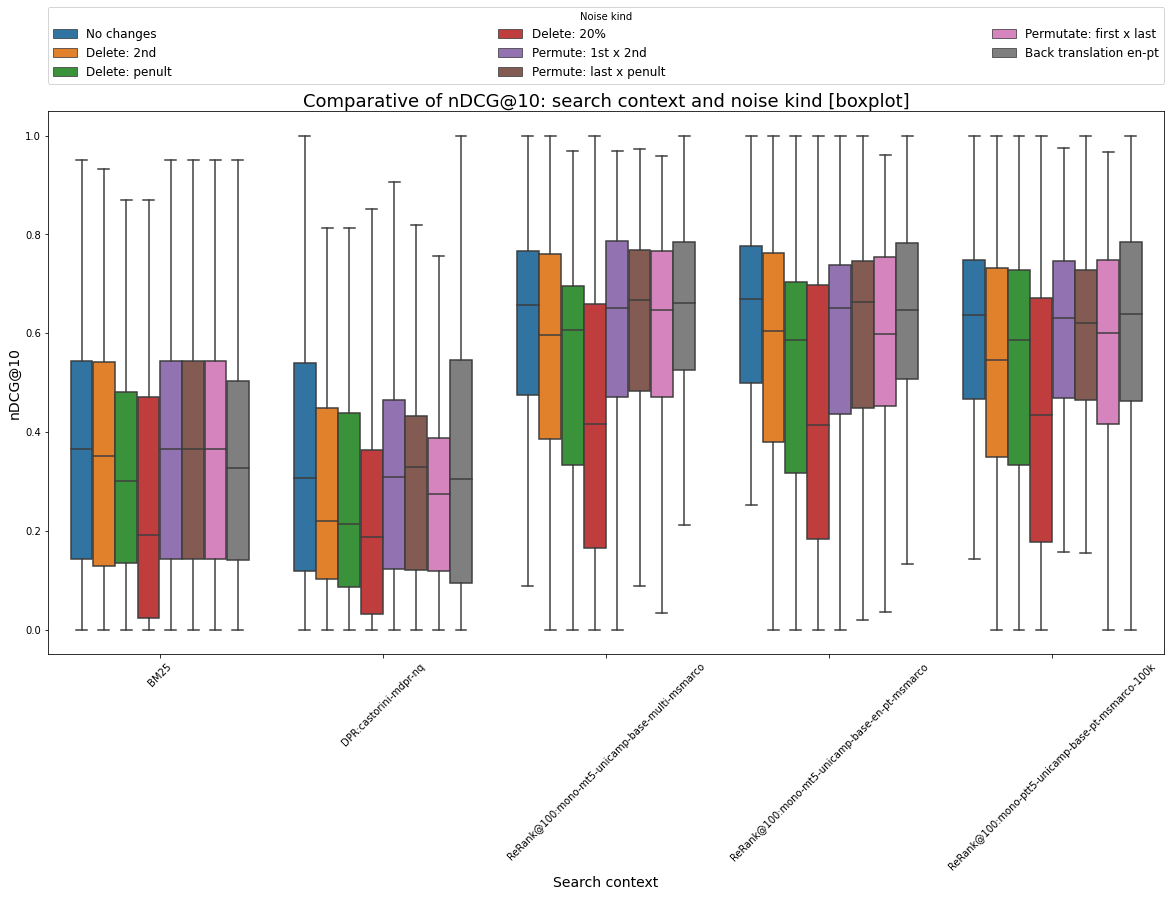

In [60]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="search_context", hue="noise_kind", y="value", ax=ax,  data=df_nDCG10, showfliers = False)
plt.xlabel('Search context', fontsize=14)
plt.ylabel('nDCG@10', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparative of nDCG@10: search context and noise kind [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

## Exploring DG:nDCG@10

## Structure change: query x noisy

In [61]:
df_dg_nDCG10 = df_calculated_metric.query("cod_metric == 'DG:nDCG@10'")

In [64]:
list_noise_kind_descr = list(df_dg_nDCG10['noise_kind'].unique())
list_noise_kind_descr

['No changes',
 'Delete: 2nd',
 'Delete: penult',
 'Delete: 20%',
 'Permute: 1st x 2nd',
 'Permute: last x penult',
 'Permutate: first x last',
 'Back translation en-pt']

In [65]:
list_search_context = list(df_dg_nDCG10['search_context'].unique())
list_search_context

['BM25',
 'DPR:castorini-mdpr-nq',
 'ReRank@100:mono-mt5-unicamp-base-multi-msmarco',
 'ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco',
 'ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k']

In [62]:
import pandas as pd

desconto_ganho = {}
for row in df_dg_nDCG10.itertuples():
    if row.cod_original_query not in desconto_ganho:
        desconto_ganho[row.cod_original_query] = {}
    desconto_ganho[row.cod_original_query][(row.search_context, row.noise_kind)] = row.value
df_desconto_ganho = pd.DataFrame.from_dict(desconto_ganho, orient='index')
df_desconto_ganho.index.name = 'cod_original_query'
df_desconto_ganho.head()

,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k
,No changes,No changes,No changes,No changes,No changes,Delete: 2nd,Delete: 2nd,Delete: 2nd,Delete: 2nd,Delete: 2nd,Delete: penult,Delete: penult,Delete: penult,Delete: penult,Delete: penult,Delete: 20%,Delete: 20%,Delete: 20%,Delete: 20%,Delete: 20%,Permute: 1st x 2nd,Permute: 1st x 2nd,Permute: 1st x 2nd,Permute: 1st x 2nd,Permute: 1st x 2nd,Permute: last x penult,Permute: last x penult,Permute: last x penult,Permute: last x penult,Permute: last x penult,Permutate: first x last,Permutate: first x last,Permutate: first x last,Permutate: first x last,Permutate: first x last,Back translation en-pt,Back translation en-pt,Back translation en-pt,Back translation en-pt,Back translation en-pt
cod_original_query,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23849,0.0,0.0,0.0,0.0,0.0,0.494302,0.064571,-0.062836,-0.018938,-0.281738,0.0,-0.410848,0.038847,-0.003030,-0.094640,-0.837949,-0.009339,0.030337,-0.065404,-0.194092,0.0,0.020238,-0.104093,-0.021164,-0.071016,0.0,-0.251499,0.038847,0.008210,-0.083074,0.0,-0.688993,0.007185,-0.072730,-0.003567,-0.093026,0.070389,0.047600,0.016998,-0.027690
42255,0.0,0.0,0.0,0.0,0.0,0.000000,0.999915,0.086282,0.084933,0.083814,0.0,-0.045754,0.000000,0.000000,-0.076631,0.000000,0.584913,0.086282,0.084933,0.020234,0.0,0.000000,0.000000,0.000000,-0.006212,0.0,0.365181,0.000000,0.000000,-0.076631,0.0,-0.999915,0.000000,-0.015633,-0.079826,0.000000,0.584913,-0.002340,0.000000,0.004204
47210,0.0,0.0,0.0,0.0,0.0,0.018076,0.000000,-0.003490,-0.053331,-0.013723,0.0,0.000000,0.040611,0.000000,-0.003330,0.018076,-0.195890,-0.022050,-0.086034,-0.068960,0.0,-0.015977,0.040611,-0.021181,0.000000,0.0,-0.009589,-0.003490,0.000000,0.002101,0.0,-0.069979,-0.001363,-0.076446,-0.026293,-0.888466,-0.195385,-0.046376,-0.090077,-0.090002
67316,0.0,0.0,0.0,0.0,0.0,0.000000,0.333244,0.000860,0.017206,0.021113,0.0,0.000000,0.000000,0.049704,0.019196,0.041293,0.300949,-0.005011,0.086320,0.019196,0.0,0.333244,0.000860,0.018679,0.021113,0.0,0.000000,0.000000,0.017206,-0.032771,0.0,2.493393,-0.155450,-0.051399,0.015361,0.000000,0.000000,0.032076,0.078518,0.000000
118440,0.0,0.0,0.0,0.0,0.0,0.000000,-0.999108,-0.999886,-0.999872,-0.999930,0.0,-0.999108,-0.999886,-0.999872,-0.999930,0.000000,-0.999108,-0.999886,-0.999872,-0.999930,0.0,-0.999108,-0.102045,-0.064207,0.103880,0.0,5.611328,-0.004281,0.000000,0.082531,0.0,0.208875,-0.061572,0.086022,0.008565,0.000000,12.790963,-0.245911,0.697041,0.212294


## Exploring Mean

In [66]:
df_desconto_ganho_medio = df_desconto_ganho.mean().unstack().T
#df_desconto_ganho_medio = df_desconto_ganho_medio.reindex(list_search_context, axis=1)
#df_desconto_ganho_medio = df_desconto_ganho_medio.reindex(list_noise_kind_descr, axis=0)
df_desconto_ganho_medio

,BM25,DPR:castorini-mdpr-nq,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k
Back translation en-pt,0.055387,0.335762,-0.003610,-0.005978,-0.026844
Delete: 20%,-0.222076,-0.116941,-0.301059,-0.268368,-0.289880
Delete: 2nd,-0.074725,-0.095224,-0.135226,-0.085874,-0.131272
Delete: penult,0.100688,-0.004481,-0.169979,-0.154095,-0.133537
No changes,0.000000,0.000000,0.000000,0.000000,0.000000
Permutate: first x last,0.000000,-0.012128,-0.020622,0.043482,-0.041932
Permute: 1st x 2nd,0.000000,0.107247,-0.044445,0.005749,0.004463
Permute: last x penult,0.000000,0.156604,-0.031190,-0.014189,-0.017471


In [81]:
#(df_desconto_ganho_medio+1).T.plot.bar(rot=90, figsize=(20,10), title='Mean dicount or gain for each noise kind and search context', ylabel='DG:nDCG@10 médio + 1', ylim=(0,+1.5))
#plt.show()

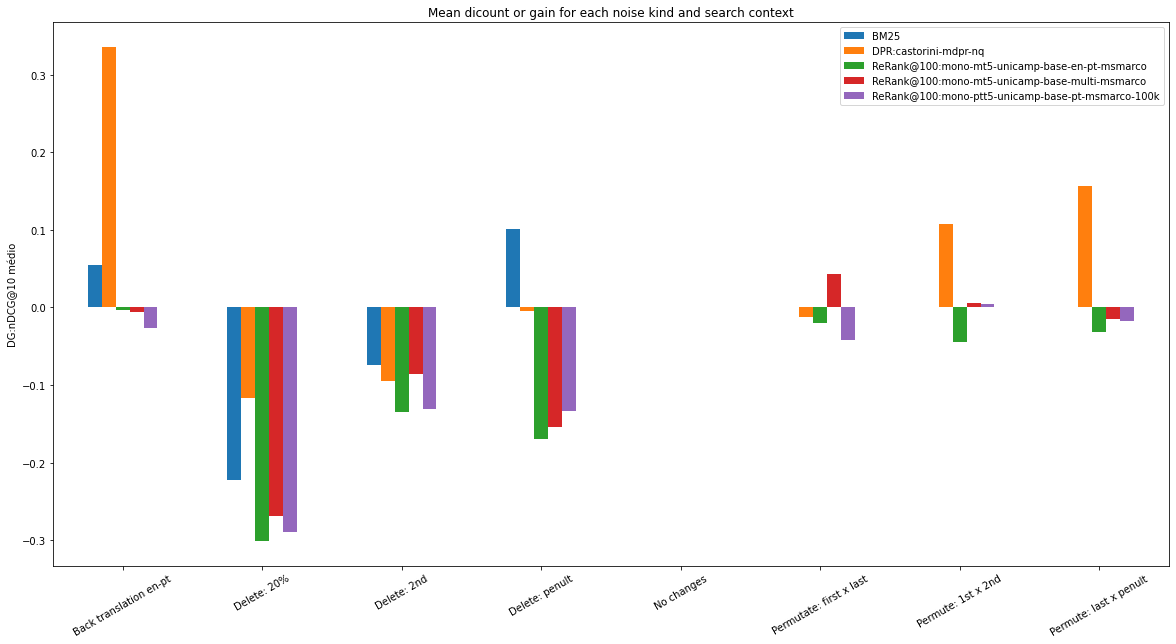

In [67]:
df_desconto_ganho_medio.plot.bar(rot=30, figsize=(20,10), title='Mean dicount or gain for each noise kind and search context', ylabel='DG:nDCG@10 médio')
plt.show()

## Distributions

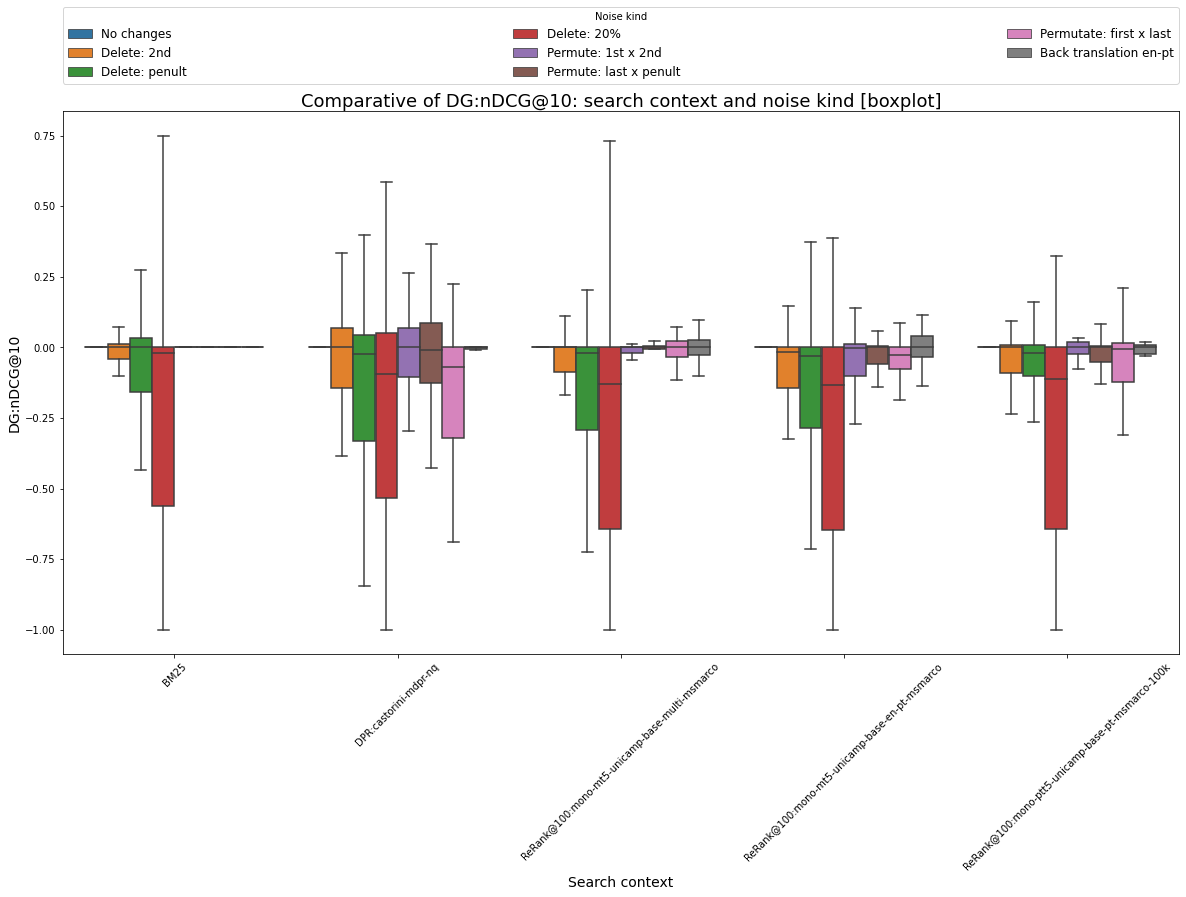

In [68]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="search_context", hue="noise_kind", y="value", ax=ax,  data=df_dg_nDCG10, showfliers = False)
plt.xlabel('Search context', fontsize=14)
ax.set_xticklabels(list_search_context,rotation=45)
plt.ylabel('DG:nDCG@10', fontsize=14)
ax.set_title('Comparative of DG:nDCG@10: search context and noise kind [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

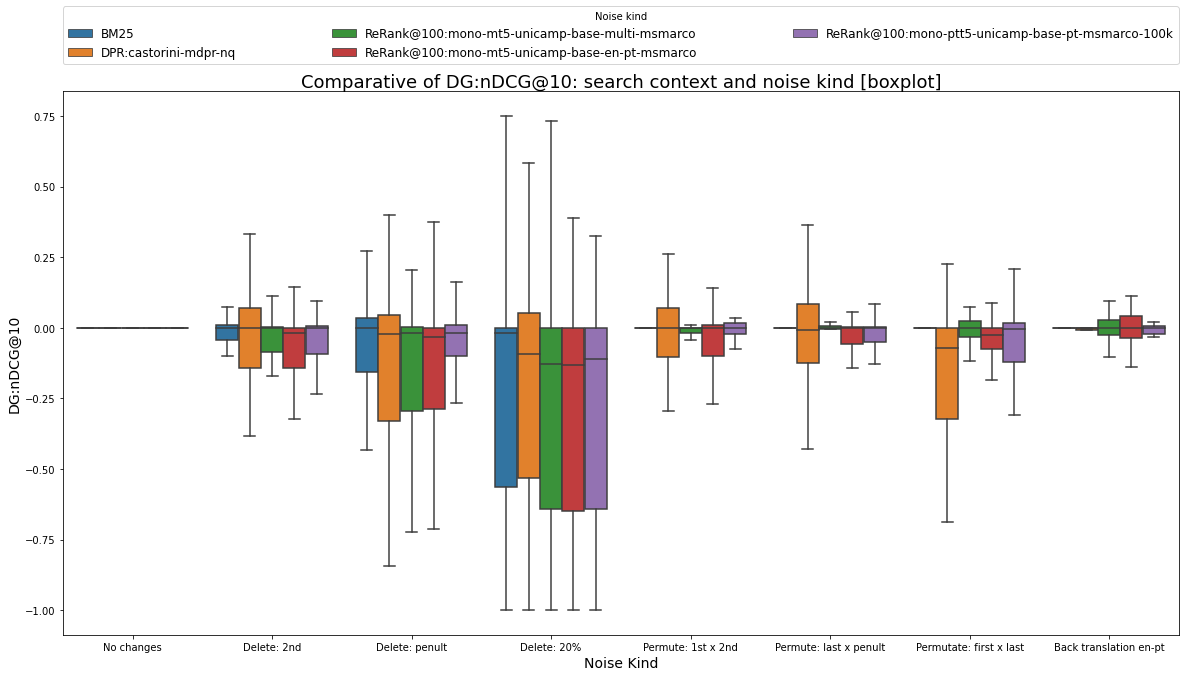

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="noise_kind", hue="search_context", y="value", ax=ax, data=df_dg_nDCG10, showfliers = False)
plt.xlabel('Noise Kind', fontsize=14)
plt.ylabel('DG:nDCG@10', fontsize=14)
ax.set_title('Comparative of DG:nDCG@10: search context and noise kind [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

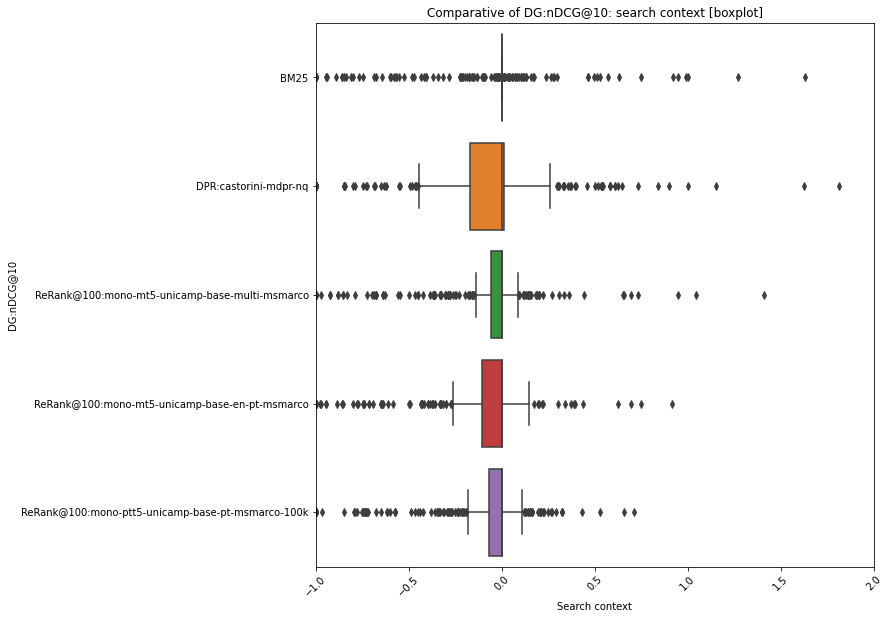

In [88]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(y="search_context", x="value", ax=ax, data=df_dg_nDCG10)# showfliers = False)
ax.set(ylabel = 'DG:nDCG@10', xlabel = 'Search context')
ax.set(xlim=(-1, 2))
plt.xticks(rotation=45)
ax.set_title('Comparative of DG:nDCG@10: search context [boxplot]')
fig.savefig('graphics\comparative_search_context_boxplot', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

## Correlations

In [128]:
df_dg_nDCG10['value'].corr(df_dg_nDCG10['qtd_tokens'])

0.09266332047017413

In [140]:
noise='No changes'

In [142]:
df_dg_nDCG10.query("noise_kind == '" + noise + "'" )

,date_time_execution,cod_metric,cod_original_query,cod_noise_kind,cod_search_context,value,qtd_judment_assumed,language,noise_kind,search_engine,search_context,text,qtd_tokens,qtd_tokens_passing,qtd_tokens_missing
2,2021-12-03 21:01:52,DG:nDCG@10,23849,0,6,0.0,0,pt,No changes,Elastic,BM25,são informações públicas de registros de natur...,7,0,0
5,2021-12-03 21:01:52,DG:nDCG@10,23849,0,7,0.0,0,pt,No changes,Elastic,DPR:castorini-mdpr-nq,são informações públicas de registros de natur...,7,0,0
8,2021-12-03 21:01:52,DG:nDCG@10,23849,0,8,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,são informações públicas de registros de natur...,7,0,0
11,2021-12-03 21:01:52,DG:nDCG@10,23849,0,9,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,são informações públicas de registros de natur...,7,0,0
20,2021-12-06 08:09:13,DG:nDCG@10,23849,0,12,0.0,0,pt,No changes,Elastic,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,são informações públicas de registros de natur...,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,6,0.0,0,pt,No changes,Elastic,BM25,por que os antigos egípcios chamavam sua terra...,14,0,1
1436,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,7,0.0,0,pt,No changes,Elastic,DPR:castorini-mdpr-nq,por que os antigos egípcios chamavam sua terra...,14,0,1
1439,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,8,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,por que os antigos egípcios chamavam sua terra...,14,0,1
1442,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,9,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,por que os antigos egípcios chamavam sua terra...,14,0,1


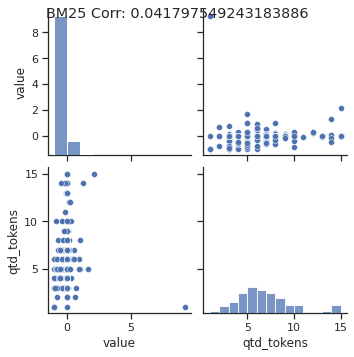

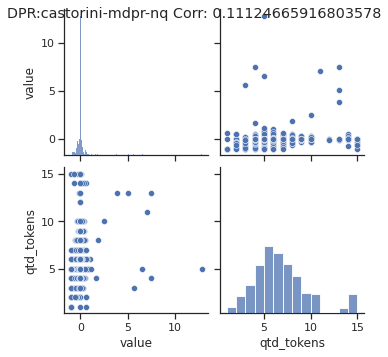

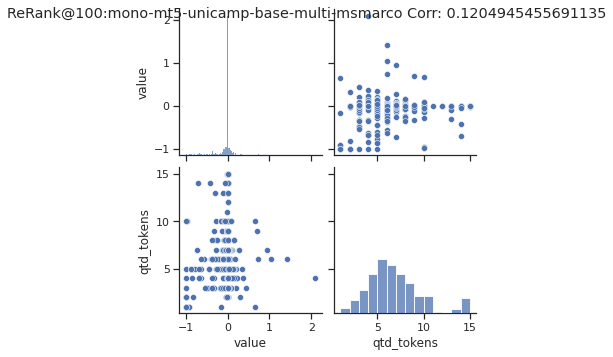

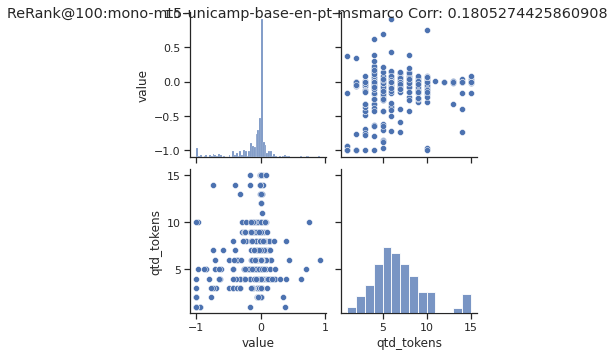

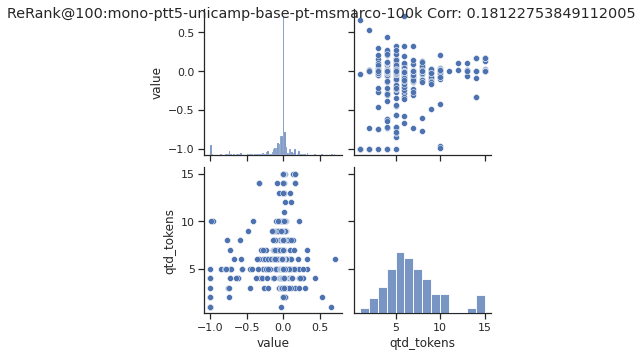

In [166]:
sns.set(style="ticks", color_codes=True)  
for search_context in df_dg_nDCG10['search_context'].unique():
  df = df_dg_nDCG10.query("search_context == '" + search_context + "'" )[['value', 'qtd_tokens']]
  title = search_context + " Corr: " + str(df['value'].corr(df['qtd_tokens']))
  # print("      covariance", df['value'].cov(df['qtd_tokens']))
  ax = sns.pairplot(df)
  ax.fig.suptitle(title)
  

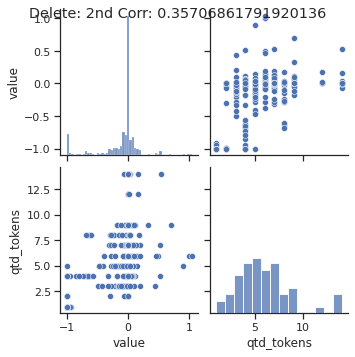

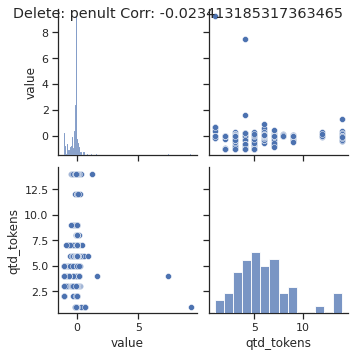

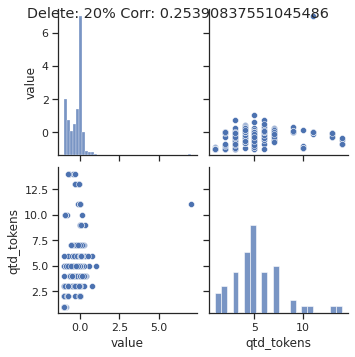

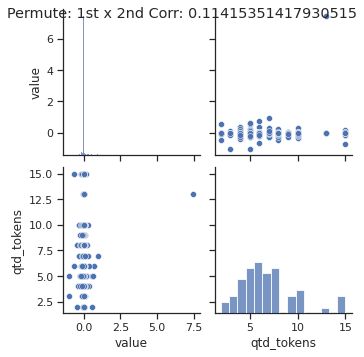

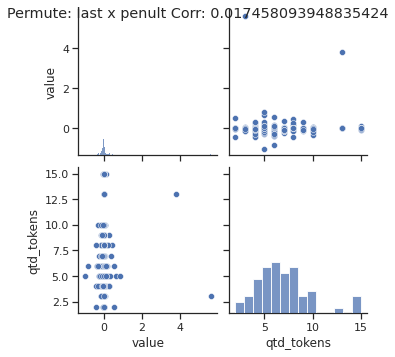

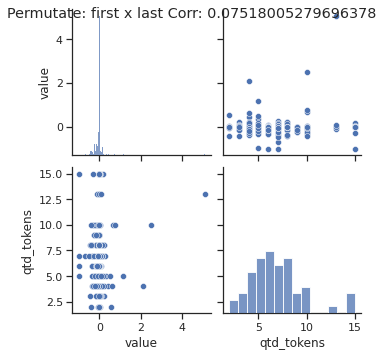

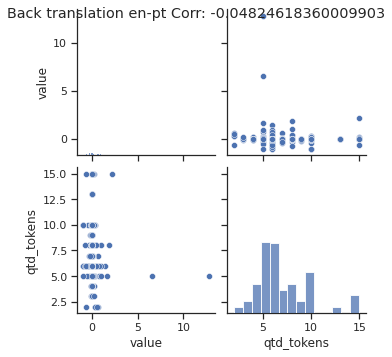

In [163]:
sns.set(style="ticks", color_codes=True)  
for noise in ['Delete: 2nd', 'Delete: penult', 'Delete: 20%',
       'Permute: 1st x 2nd', 'Permute: last x penult',
       'Permutate: first x last', 'Back translation en-pt']:
  df = df_dg_nDCG10.query("noise_kind == '" + noise + "'" )[['value', 'qtd_tokens']]
  title = noise + " Corr: " + str(df['value'].corr(df['qtd_tokens']))
  # print("      covariance", df['value'].cov(df['qtd_tokens']))
  ax = sns.pairplot(df)
  ax.fig.suptitle(title)
  
  
  


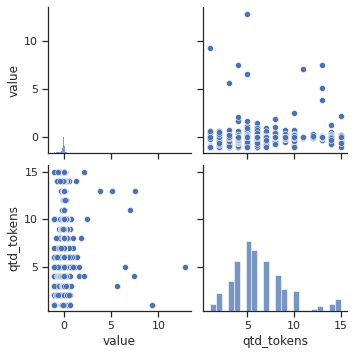

In [149]:
 ax = sns.pairplot(df_dg_nDCG10.query("cod_noise_kind != 0")[['value', 'qtd_tokens']])

In [147]:
df_dg_nDCG10.query("noise_kind == '" + noise + "'" )[['value', 'qtd_tokens','qtd_tokens_missing']].corr()


,value,qtd_tokens,qtd_tokens_missing
value,1.000000,0.357069,-0.108945
qtd_tokens,0.357069,1.000000,-0.043909
qtd_tokens_missing,-0.108945,-0.043909,1.000000


## Queries Comparative

In [91]:
df_original_query  = util_bd_pandas.read_df_original_query_and_dict_val_idg()[0].query('language == "pt"')[['cod', 'text']].set_index('cod')
df_original_query

,text
cod,
23849,são informações públicas de registros de natur...
42255,salário médio de higienista dental em nebraska
47210,custo médio de alteração do vestido de noiva
67316,pode a febre causar aborto espontâneo no iníci...
118440,definir bmt medical
...,...
1132532,analista de dados de renda média anual
1133579,como o tecido de granulação começa
1136043,diferença entre um hotel e motel


In [99]:
 def plot_query(x, y, linestyle, dotstyle, color, label):
        if y:
            label = None
        if x > 1: x = 1
        ax.plot(np.linspace(0, x, 10), Y+i, linestyle=linestyle, linewidth=1.5, color=color)
        ax.plot(x, y, dotstyle, label=label)

In [97]:
def build_graph(noise, short):
    df1 = df_dg_nDCG10.query('noise_kind == "' + noise + '"')[['cod_original_query', 'search_context', 'value']].set_index('cod_original_query')
    df2 = pd.DataFrame(index=df_original_query.index)
    for search_context in df1.search_context.unique():
        df2[search_context] = df1.query('search_context == "' + search_context + '"')['value']
    df2['Text'] = df_original_query['text']
    df2['sort'] = abs(df2['TREC 2020 Full-ReRank@1000']) + abs(df2['TREC 2020 Judment EN-DPR']) + abs(df2['TREC 2020 Full-BM25'])
    df2 = df2.dropna()
    df2 = df2.sort_values('sort', ascending=False)

    fig = plt.figure(figsize=(10, 20))
    ax = fig.subplots()
    data = df2.to_dict(orient='index')

    Y = np.zeros(10)
    yticklabels = []

    formato = ['solid', 'dashed', 'dotted']
    cores =   ['blue', 'green', 'red']
    marcas =  ['bo', 'gs', 'rd']

    for i, query in enumerate(data.keys()):
      valores = np.array([data[query]['TREC 2020 Full-BM25']
                          ,data[query]['TREC 2020 Full-ReRank@1000']
                          ,data[query]['TREC 2020 Judment EN-DPR']
                          ])

      #print(valores)
      ordem = (-valores).argsort()

      for pos in range(len(ordem)):
        prox_pos = ordem[pos]
        plot_query(data[query][search_contexts[prox_pos]], i, formato[prox_pos], marcas[prox_pos], cores[prox_pos], search_contexts[prox_pos].split('_')[0])

      yticklabels.append(data[query]['Text'])

    legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
    ax.set_title(noise)
    ax.set(ylim=(-1, len(data)+4.5),
            yticks=np.arange(len(data)), 
            xticks=np.arange(-1.0, 1.10, .20),
            yticklabels=yticklabels)
    ax.set_xlabel('DG:nDCG@10')
    ax.tick_params(left=False, bottom=True, labelbottom=True)
    fig.savefig('dg_ndcg10_' + short + '.png', transparent=False, dpi=80, bbox_inches='tight')

In [98]:
for noise in ['No changes', 'Delete: 2nd', 'Delete: penult', 'Delete: 20%',
       'Permute: 1st x 2nd', 'Permute: last x penult',
       'Permutate: first x last', 'Back translation en-pt']:
  build_graph(noise, noise) 
  break

KeyError: ignored

In [114]:
short = 'Delete: 2nd'
noise  = 'Delete: 2nd'

In [121]:
df1 = df_dg_nDCG10.query('noise_kind == "' + noise + '"')[['cod_original_query', 'search_context', 'value']].set_index('cod_original_query')
df2 = pd.DataFrame(index=df_original_query.index)
search_contexts = list(df1.search_context.unique())
for search_context in search_contexts:
    df2[search_context] = df1.query('search_context == "' + search_context + '"')['value']
df2['Text'] = df_original_query['text']

In [122]:
colunas_df2 = list(df2.columns)
search_contexts = list(df2.columns)[:-1]
# colunas_df2

['BM25',
 'DPR:castorini-mdpr-nq',
 'ReRank@100:mono-mt5-unicamp-base-multi-msmarco',
 'ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco',
 'ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k',
 'Text']

In [106]:
# df1.columns

Index(['search_context', 'value'], dtype='object')

In [126]:
df2['sort'] = abs(df2[search_contexts[0]]) + abs(df2[search_contexts[1]]) + abs(df2[search_contexts[2]]) + abs(df2[search_contexts[3]]) + abs(df2[search_contexts[4]])
df2 = df2.dropna()
df2 = df2.sort_values('sort', ascending=False)
data = df2.to_dict(orient='index')

In [127]:
data

{23849: {'BM25': 0.49430222494286613,
  'DPR:castorini-mdpr-nq': 0.06457084736731789,
  'ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco': -0.01893802031754932,
  'ReRank@100:mono-mt5-unicamp-base-multi-msmarco': -0.06283649010147685,
  'ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k': -0.28173834793830765,
  'Text': 'são informações públicas de registros de naturalização',
  'sort': 0.9223859306675178},
 42255: {'BM25': 0.0,
  'DPR:castorini-mdpr-nq': 0.9999150031897719,
  'ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco': 0.08493318731563515,
  'ReRank@100:mono-mt5-unicamp-base-multi-msmarco': 0.08628200765832594,
  'ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k': 0.0838138277059004,
  'Text': 'salário médio de higienista dental em nebraska',
  'sort': 1.2549440258696334},
 47210: {'BM25': 0.018076374080266522,
  'DPR:castorini-mdpr-nq': 0.0,
  'ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco': -0.053330684894682956,
  'ReRank@100:mono-mt5-unicamp-base-multi-msmarco': -0.00348970

In [ ]:
fig = plt.figure(figsize=(10, 20))
ax = fig.subplots()


Y = np.zeros(10)
yticklabels = []

formato = ['solid', 'dashed', 'dotted']
cores =   ['blue', 'green', 'red']
marcas =  ['bo', 'gs', 'rd']

for i, query in enumerate(data.keys()):
  valores = np.array([data[query][search_contexts[0]]
                      ,data[query][search_contexts[1]]
                      ,data[query][search_contexts[2]]
                      ,data[query][search_contexts[3]]
                      ,data[query][search_contexts[4]]
                      ])

  #print(valores)
  ordem = (-valores).argsort()

  for pos in range(len(ordem)):
    prox_pos = ordem[pos]
    plot_query(data[query][search_contexts[prox_pos]], i, formato[prox_pos], marcas[prox_pos], cores[prox_pos], search_contexts[prox_pos].split('_')[0])

  yticklabels.append(data[query]['Text'])

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_title(noise)
ax.set(ylim=(-1, len(data)+4.5),
        yticks=np.arange(len(data)), 
        xticks=np.arange(-1.0, 1.10, .20),
        yticklabels=yticklabels)
ax.set_xlabel('DG:nDCG@10')
ax.tick_params(left=False, bottom=True, labelbottom=True)
fig.savefig('dg_ndcg10_' + short + '.png', transparent=False, dpi=80, bbox_inches='tight')

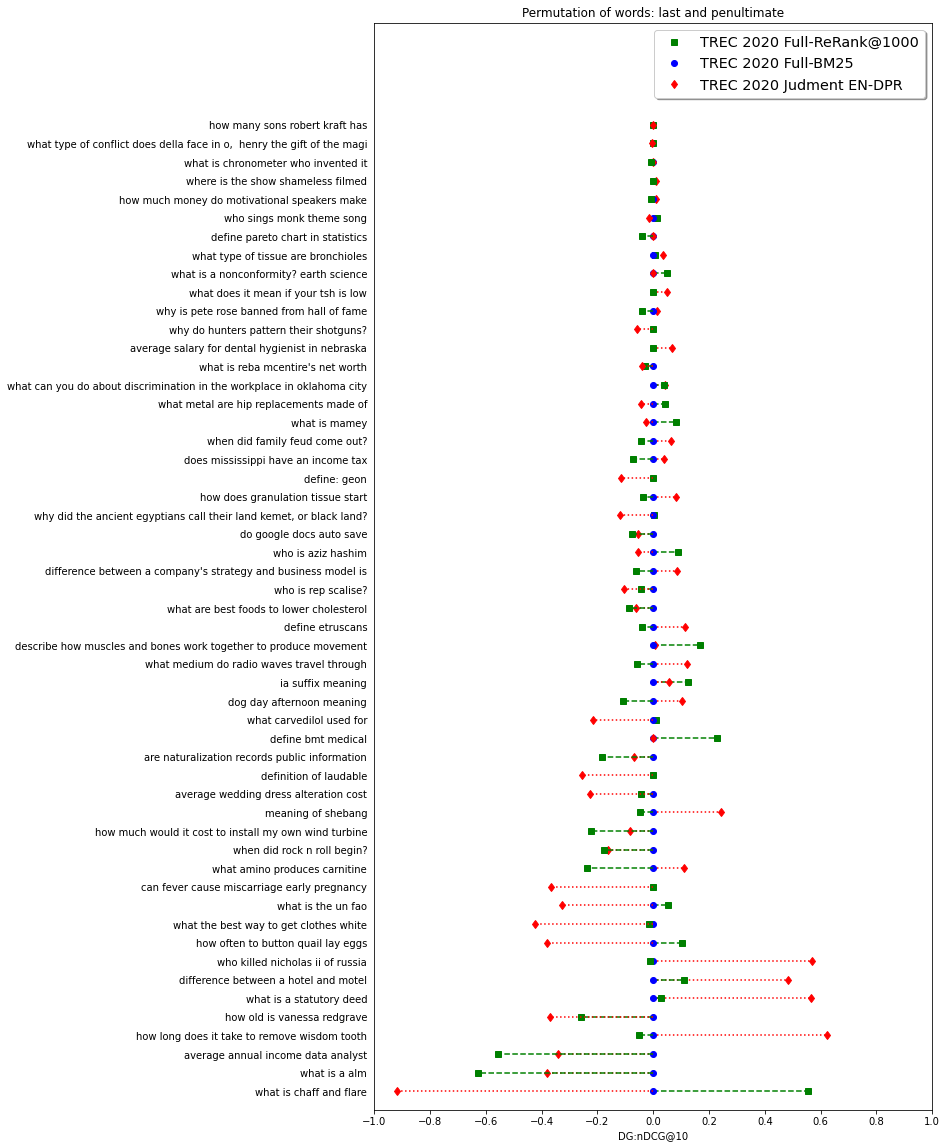

In [ ]:
noise = 'Permutation of words: last and penultimate'
short = 'permutation_first_second'
build_graph(noise, short)

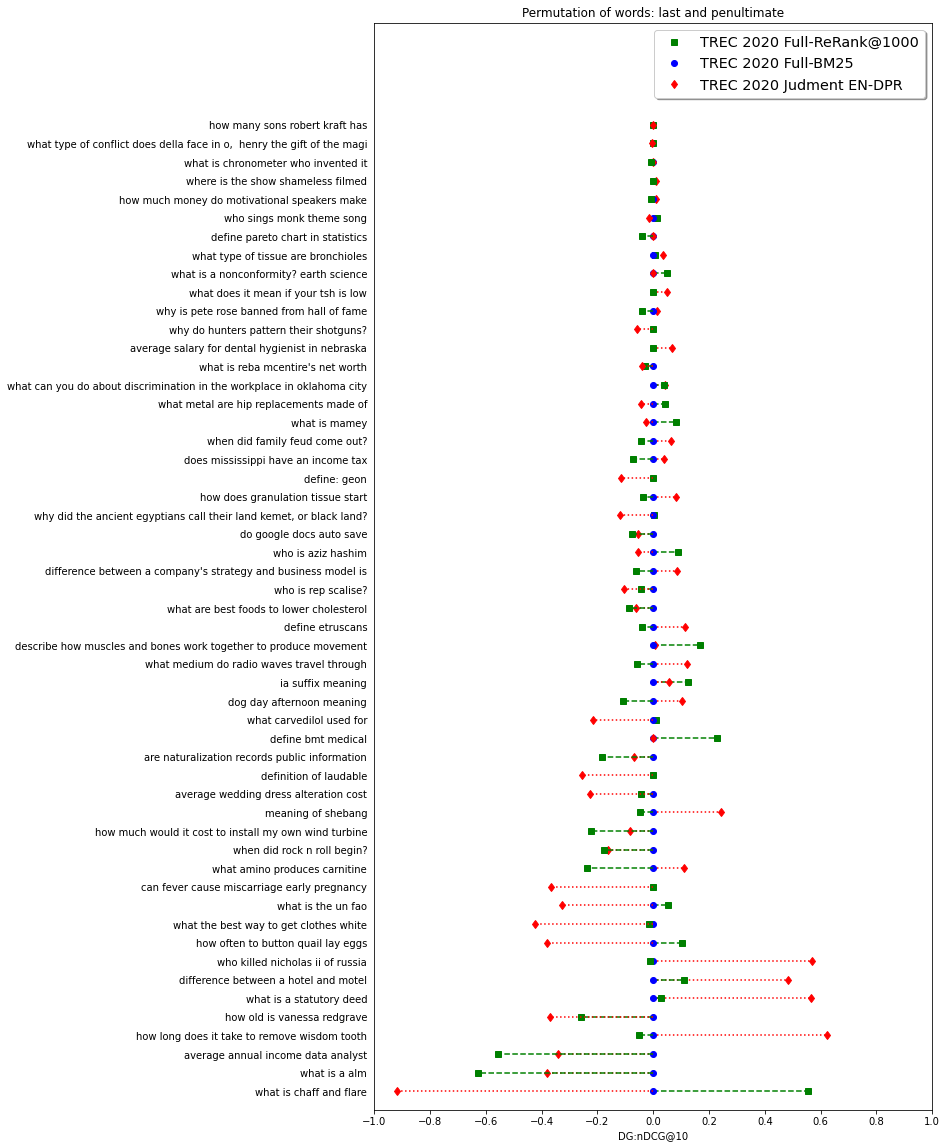

In [ ]:
noise = 'Permutation of words: last and penultimate'
short = 'permutation_last_penultimate'
build_graph(noise, short)

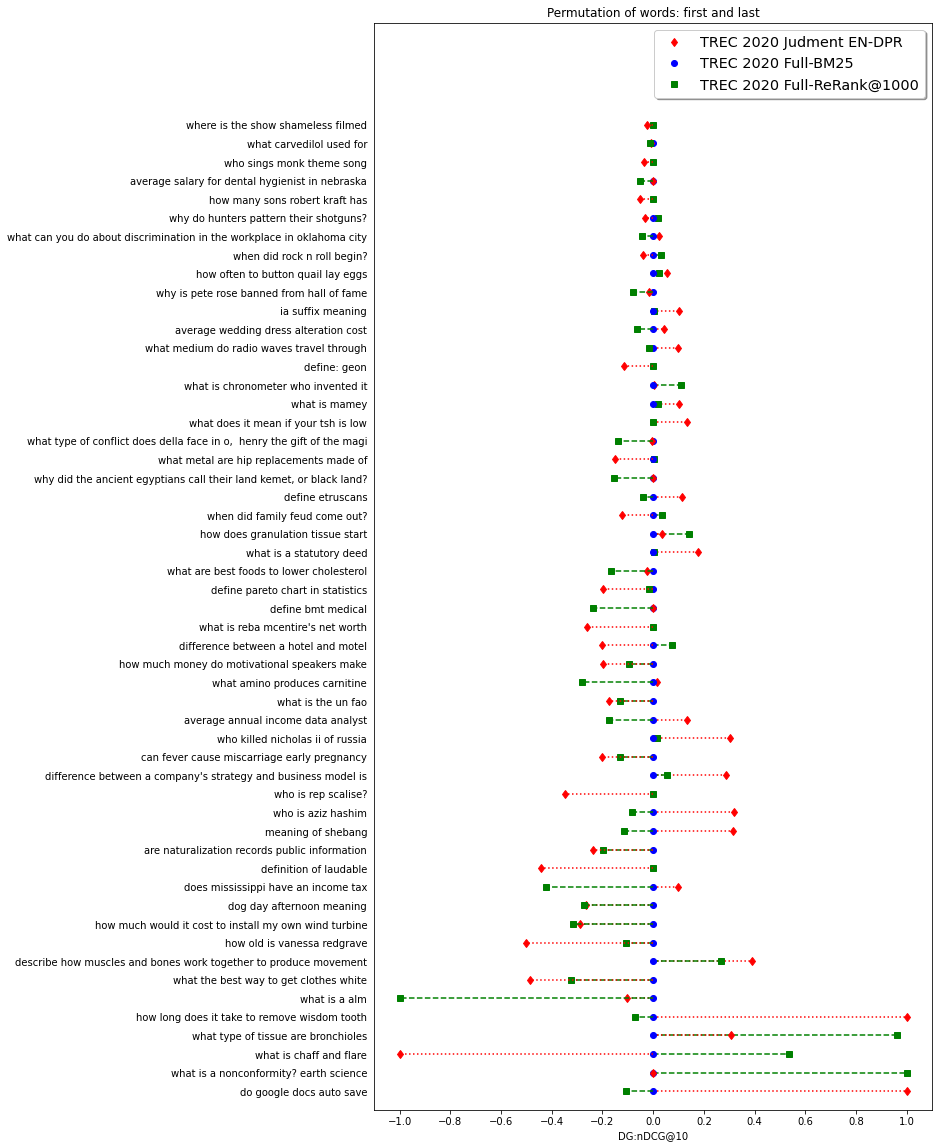

In [ ]:
noise = 'Permutation of words: first and last'
short = 'permutation_first_last'
build_graph(noise, short)

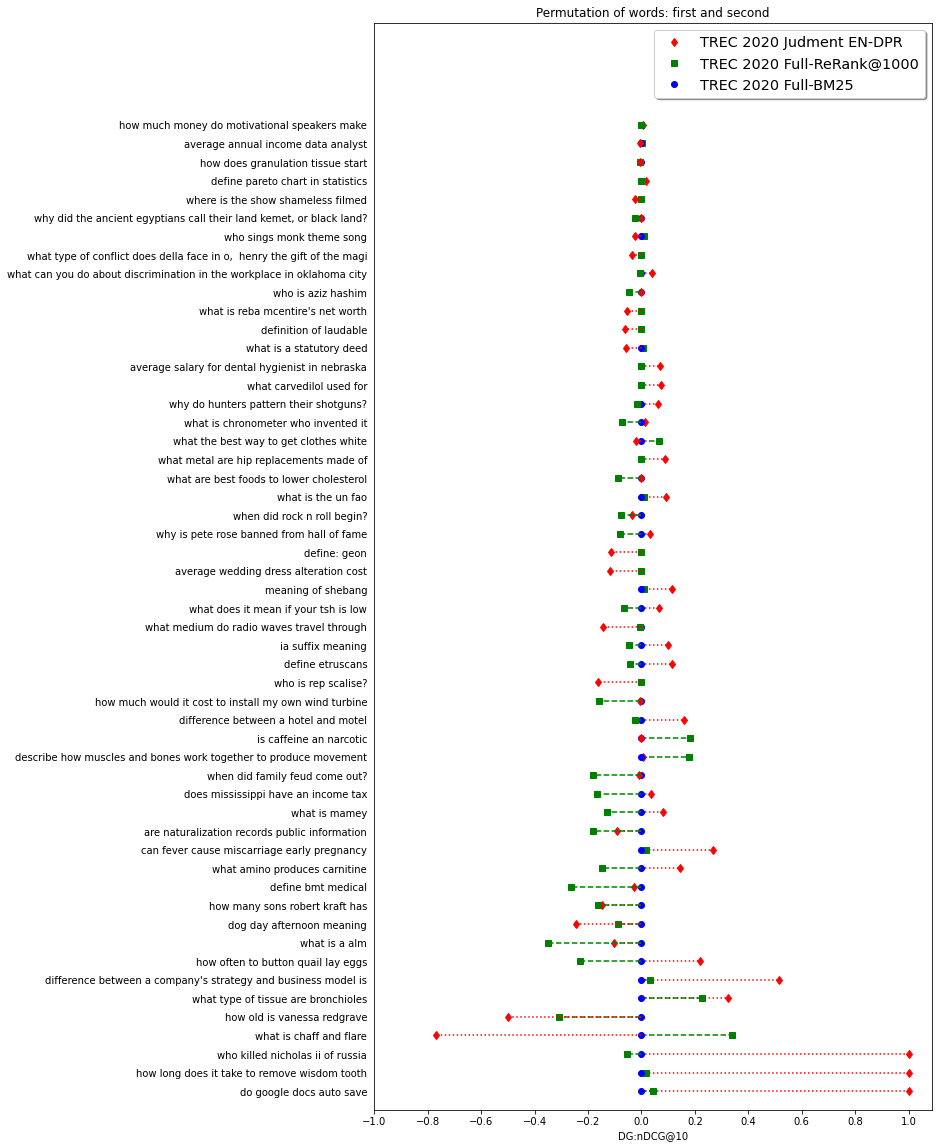

In [ ]:
noise = 'Permutation of words: first and second'
short = 'permutation_first_second'
build_graph(noise, short)

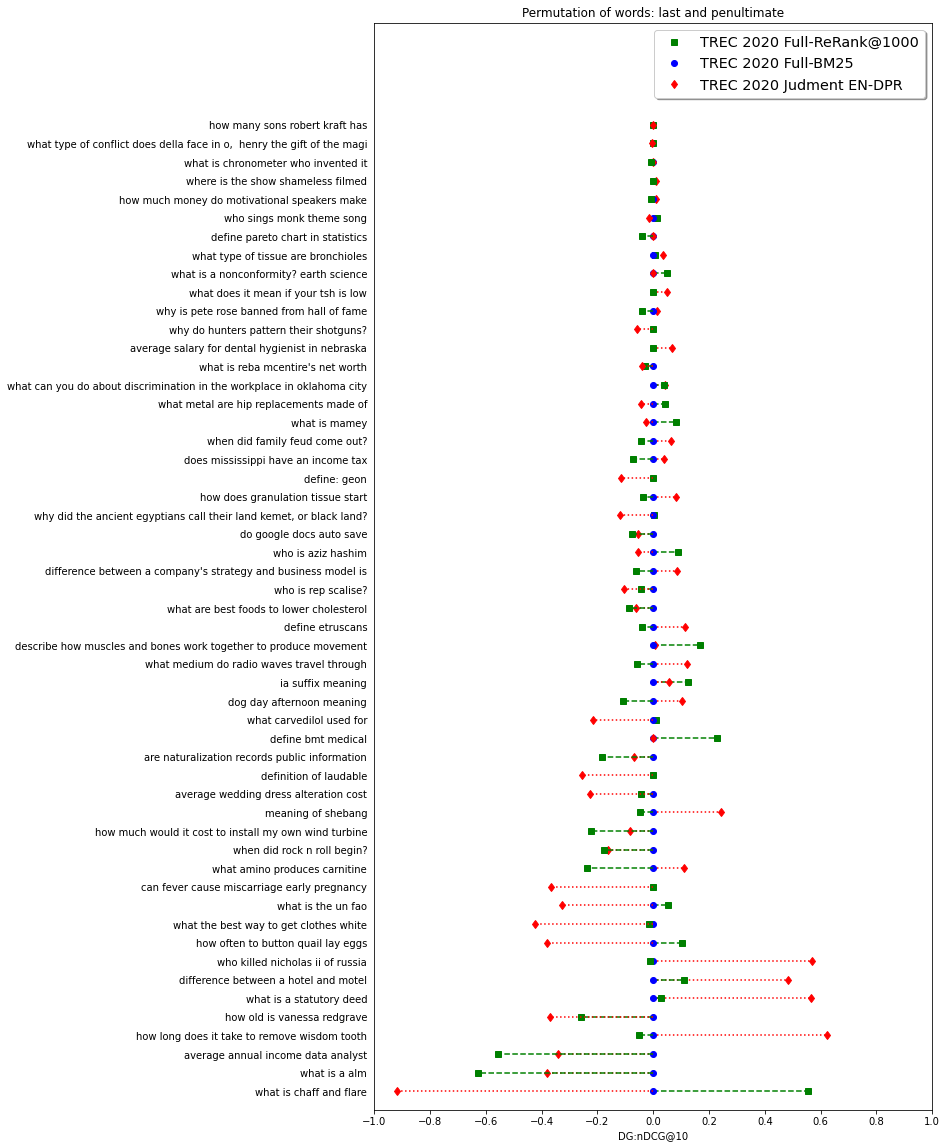

In [ ]:
noise = 'Permutation of words: last and penultimate'
short = 'permutation_last_penultimate'
build_graph(noise, short)

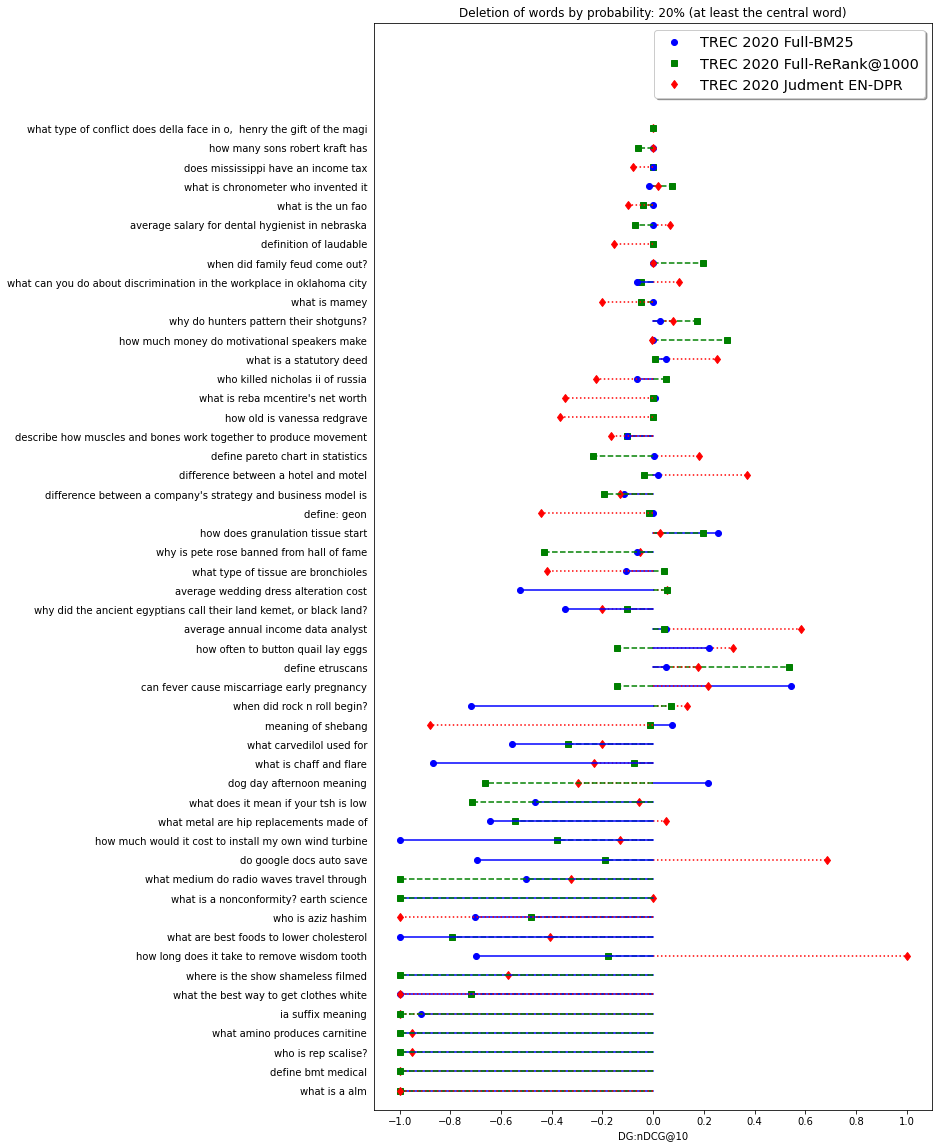

In [ ]:
noise = 'Deletion of words by probability: 20% (at least the central word)'
short = 'deletion_probability20'
build_graph(noise, short)

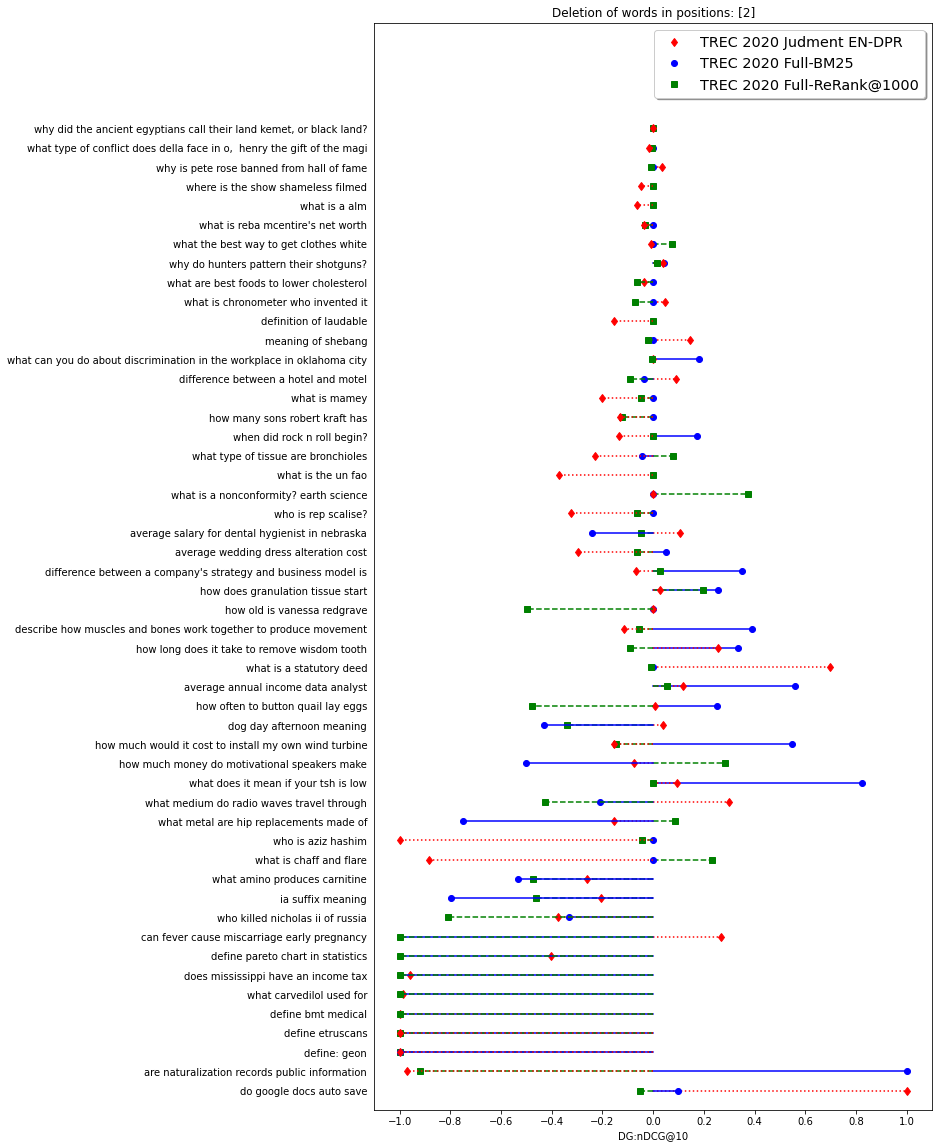

In [ ]:
noise = 'Deletion of words in positions: [2]'
short = 'deletion_position2'
build_graph(noise, short)

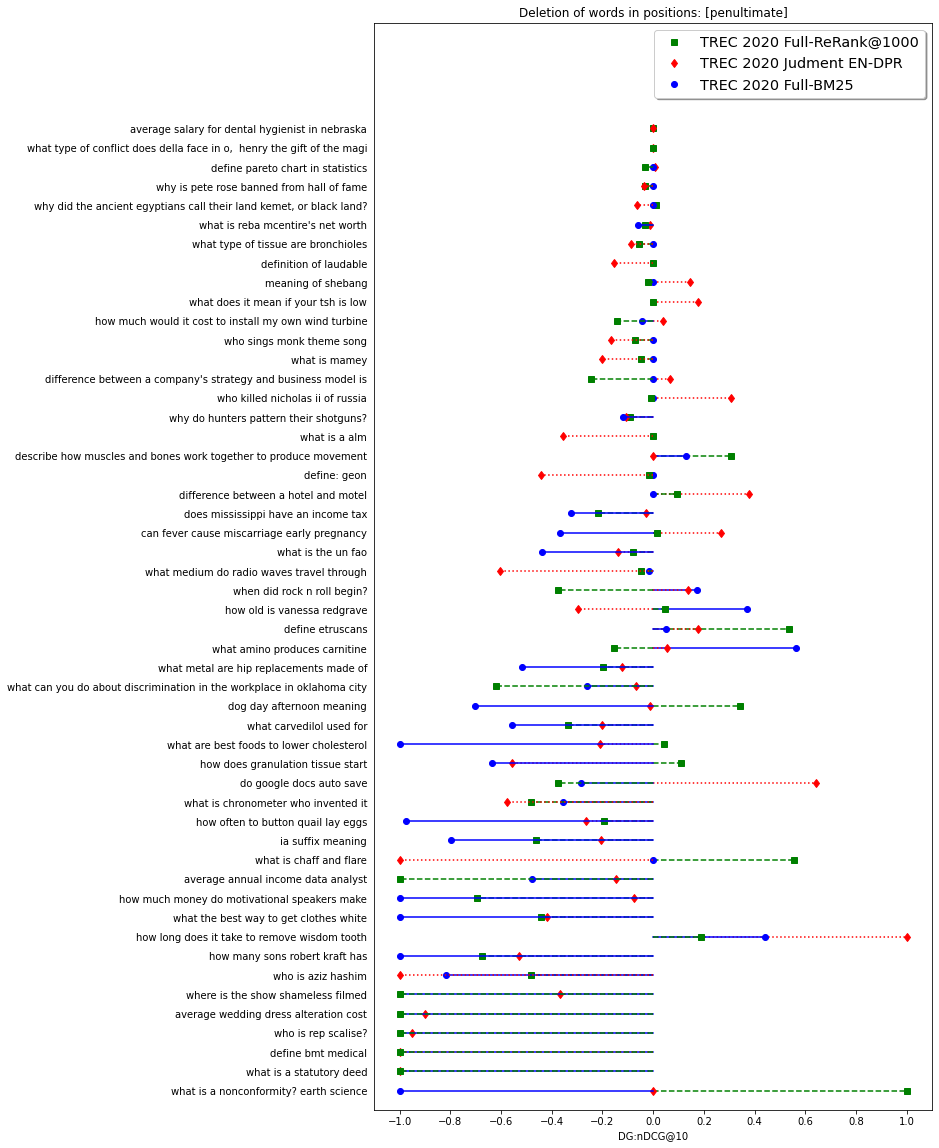

In [ ]:
noise = 'Deletion of words in positions: [penultimate]'
short = 'deletion_position_penultimate'
build_graph(noise, short)

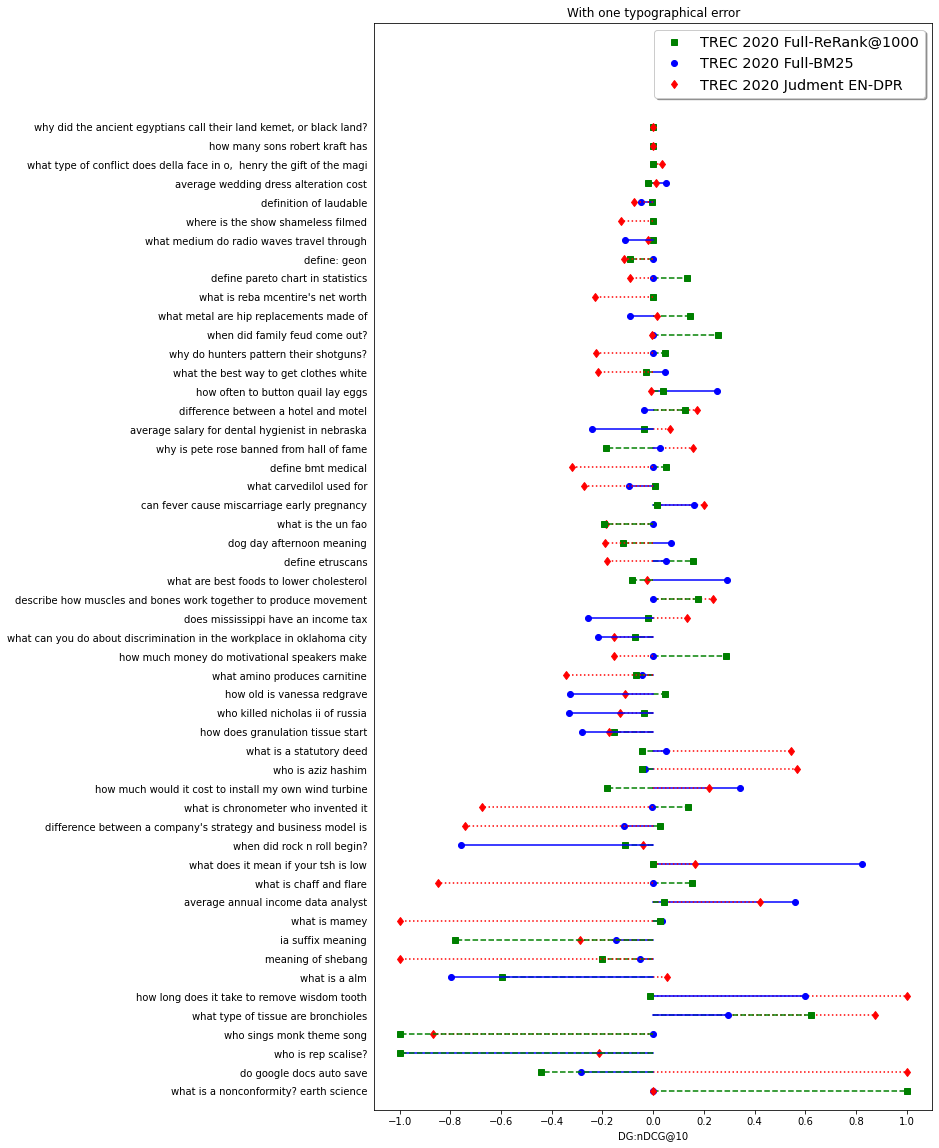

In [ ]:
noise = 'With one typographical error'
short = 'typo'
build_graph(noise, short)

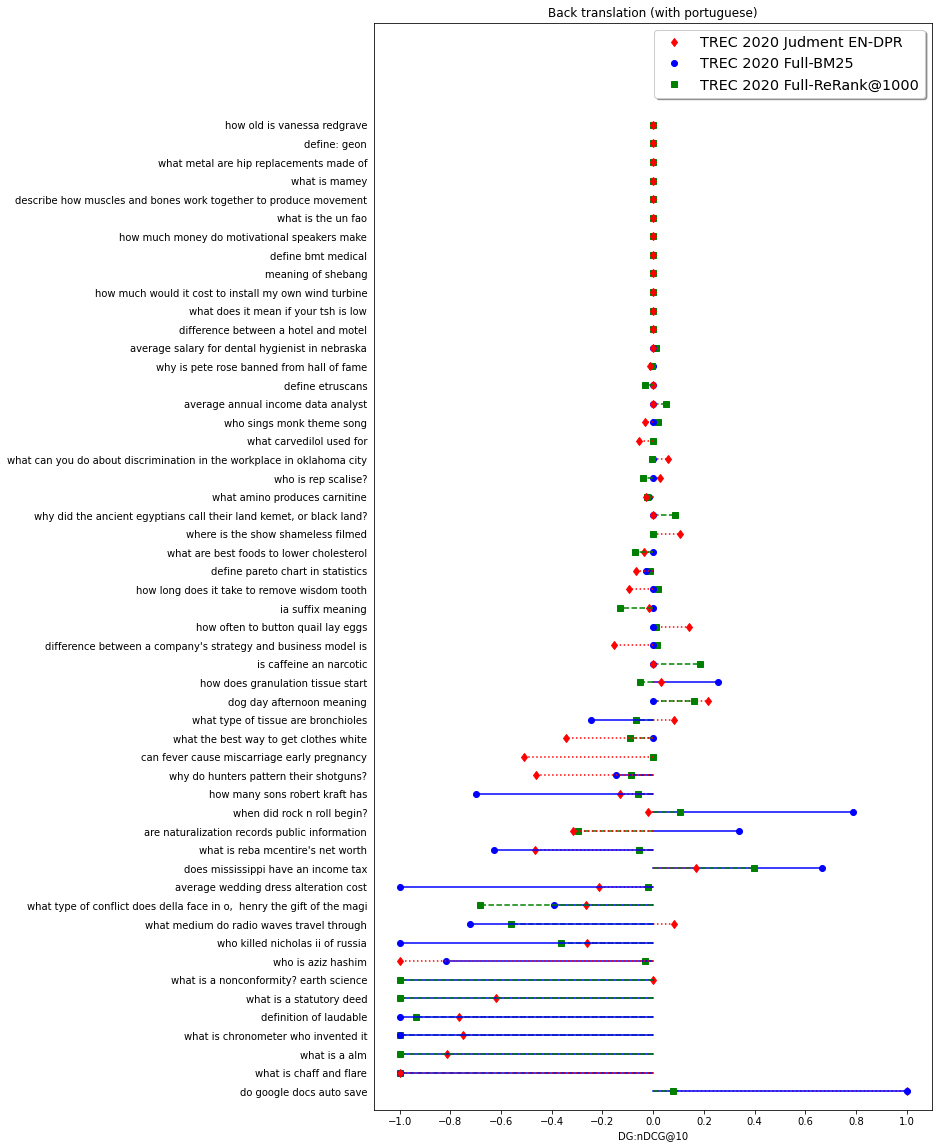

In [ ]:
noise = 'Back translation (with portuguese)'
short = 'back-translation-pt'
build_graph(noise, short)